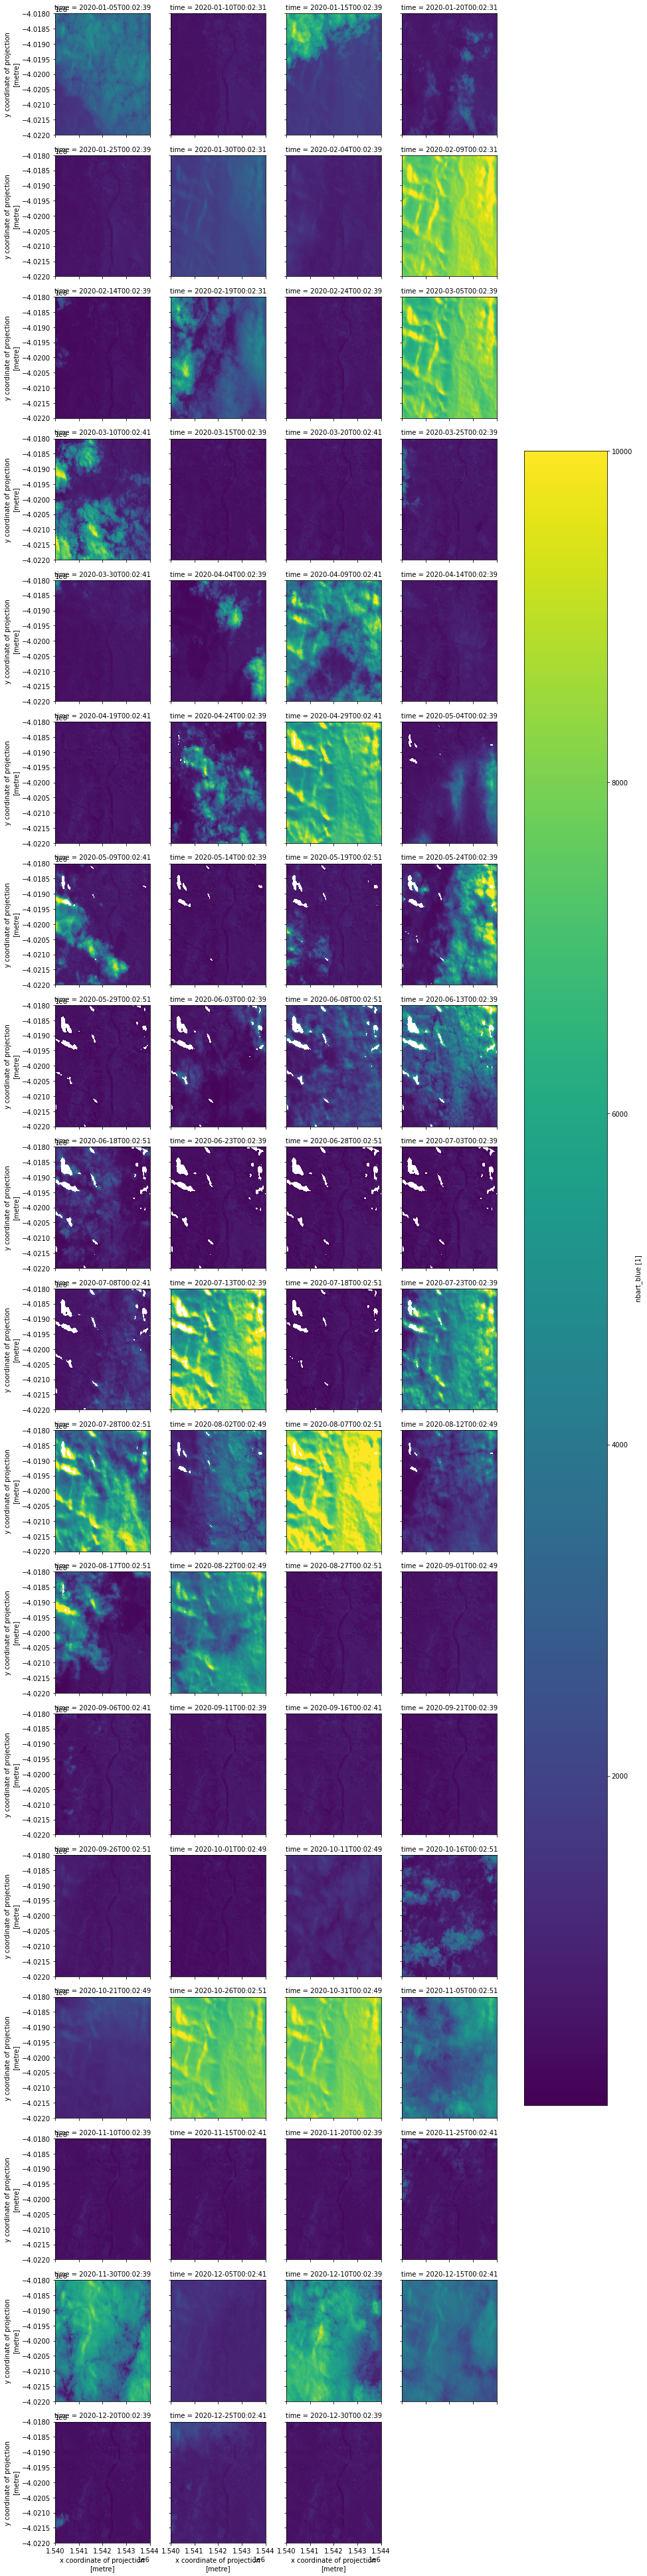

In [2]:
%matplotlib inline

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

dsa = xr.open_dataset("/home/prl900/Downloads/s2a_10_22_2020.nc")
dsb = xr.open_dataset("/home/prl900/Downloads/s2b_10_22_2020.nc")

ds = xr.concat([dsa, dsb], dim='time').sortby('time')
ds = ds.dropna('time', how='all')

ds.nbart_blue.plot(col='time', col_wrap=4)

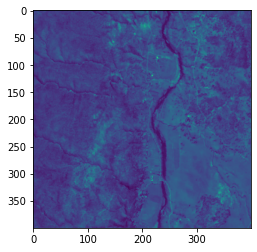

In [5]:
p30 = ds.nbart_blue.quantile(0.3, dim='time').values

plt.imshow(p30)

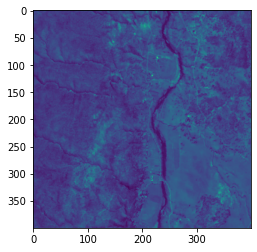

In [17]:
plt.imshow(p30)

1.0000000000027565

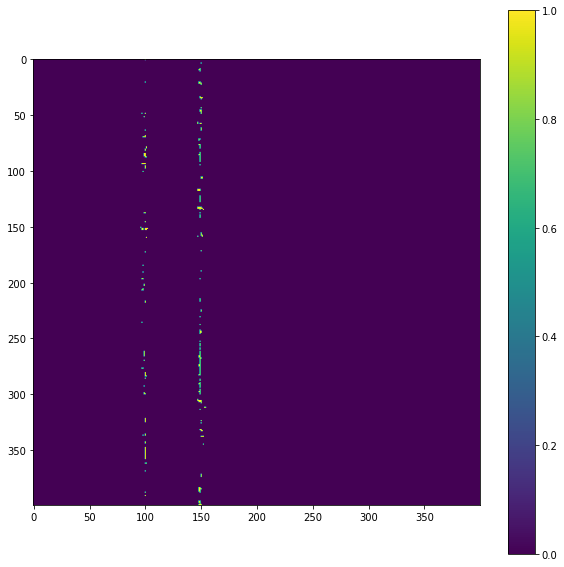

In [37]:
from skimage.metrics import structural_similarity as ssim

im = np.copy(p30)
im[:,100:150] = 0
score, grad, sim = ssim(p30, im, gradient=True, full=True)

#plt.imshow(np.abs(grad)>.5)
plt.figure(figsize=(10,10))
plt.imshow(, resample=None)
plt.colorbar()

sim.max()

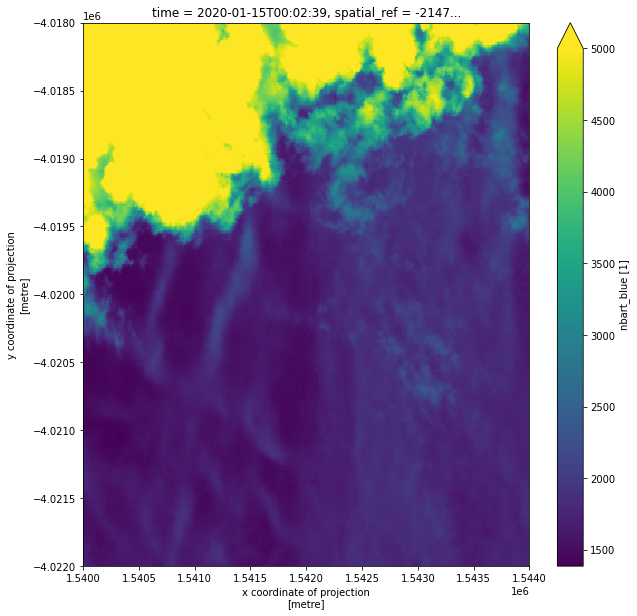

In [21]:
ds.nbart_blue.isel(time=2).plot(figsize=(10,10), vmax=5000)

<ipython-input-30-58c11623627c>:8: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim_idxs.append(ssim(p30, im))


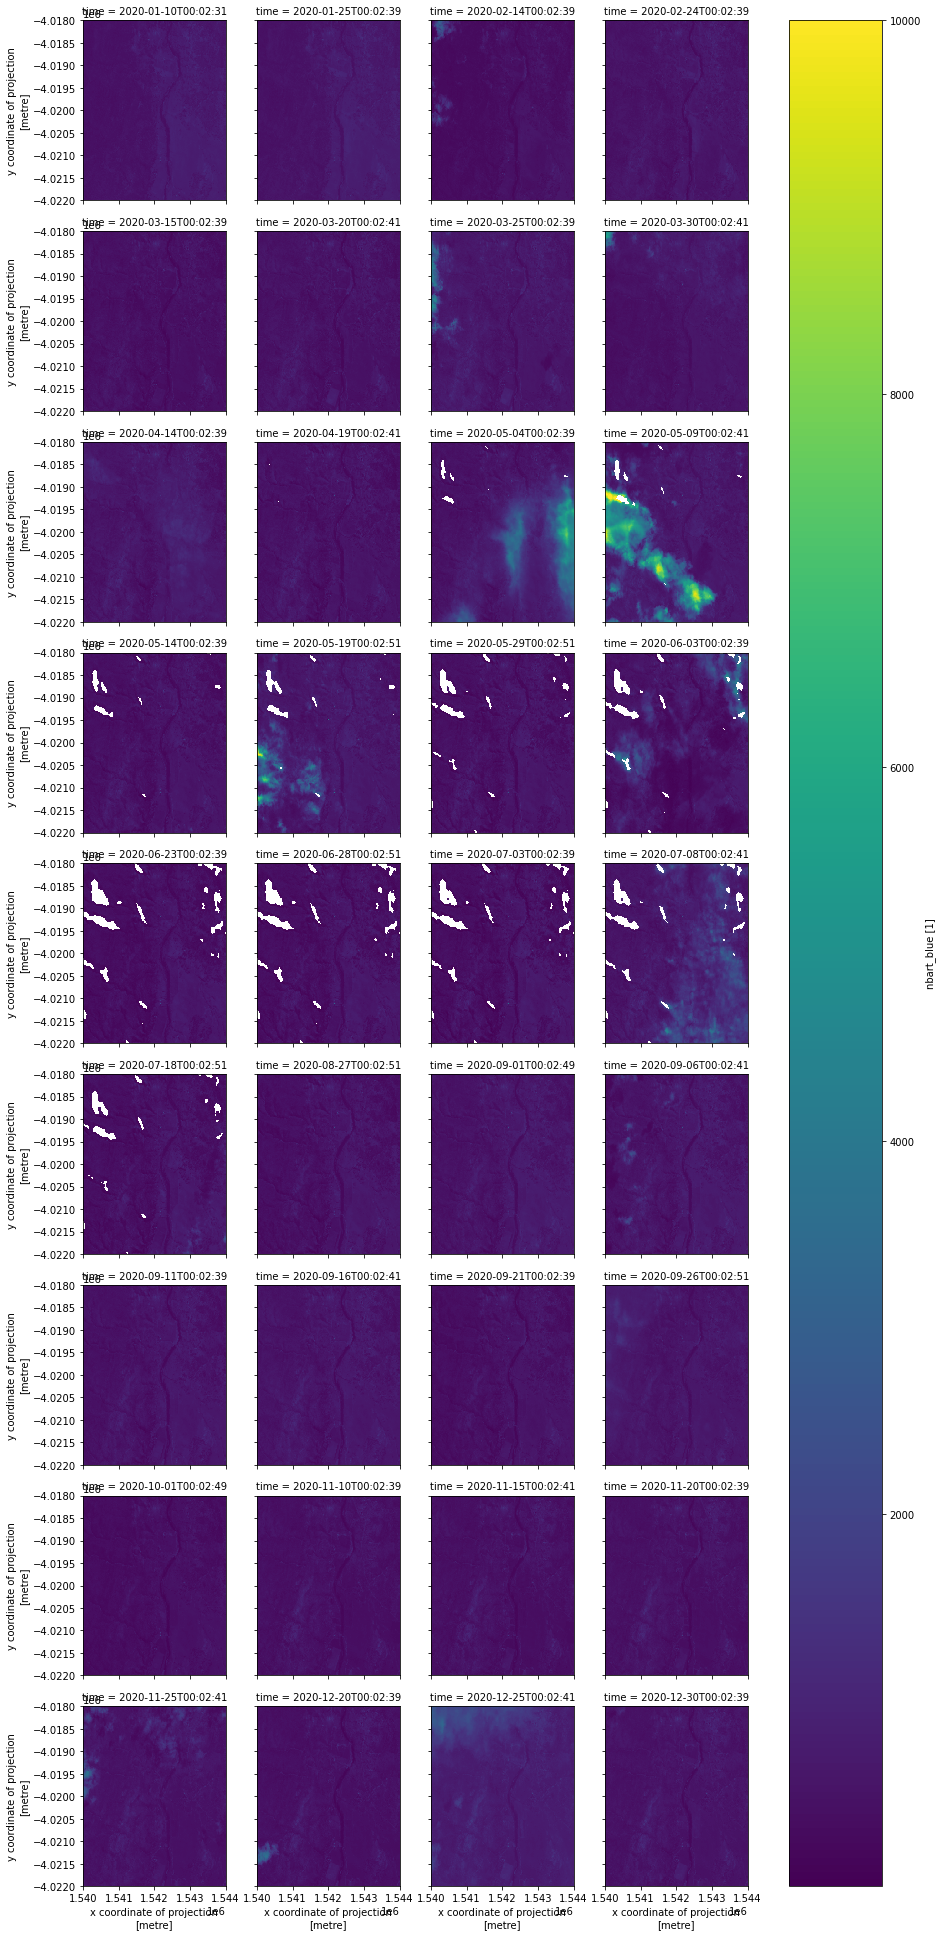

In [30]:
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim

ssim_idxs = []
for i in range(len(ds.time)):
    im = np.copy(ds.nbart_blue.isel(time=i).values)
    im[np.isnan(im)] = p30[np.isnan(im)]
    ssim_idxs.append(ssim(p30, im))
    
ds.nbart_blue.isel(time=np.array(ssim_idxs)>0.4).plot(col='time', col_wrap=4)

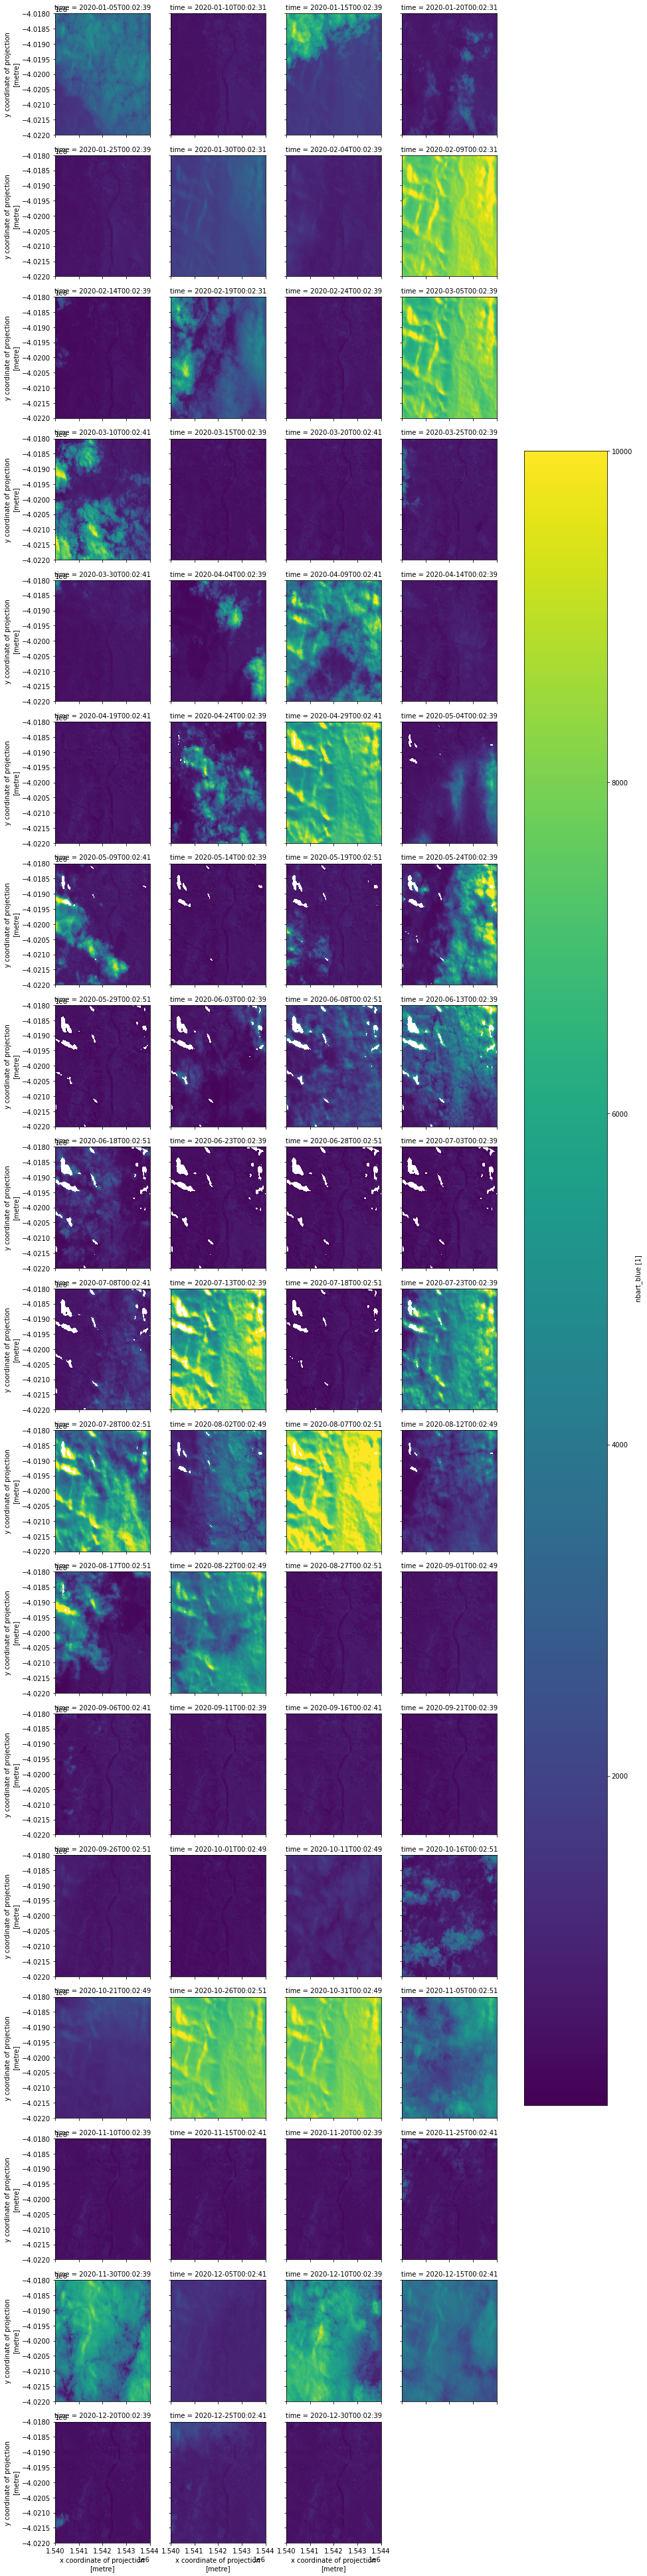

In [31]:
ds.nbart_blue.plot(col='time', col_wrap=4)